In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the phenotypic data
phenotype = "YPD_doublingtime"
phenotype_data_path = f"data/y_{phenotype}.csv"
y_phenotype = pd.read_csv(phenotype_data_path)

TimeoutError: [Errno 60] Operation timed out

In [19]:
mutations = pd.read_csv("results/mutations_importance_ranking2.csv")
mutations.drop(columns="Frequency", inplace=True)
mutations_important = mutations.iloc[:17, 0]
mutations_important

TimeoutError: [Errno 60] Operation timed out

In [5]:
# Save the X_matrix DataFrame to a pickle file
X_matrix = pd.read_csv(f"data/X_matrix_{phenotype}.csv")
X_matrix_output_path = f"data/X_matrix_{phenotype}.pkl"
X_matrix.to_pickle(X_matrix_output_path)
print(f"Combined matrix X saved to {X_matrix_output_path}")

Combined matrix X saved to data/X_matrix_YPD_doublingtime.pkl


In [21]:
X_matrix = pd.read_pickle(f"data/X_matrix_{phenotype}.csv")


TimeoutError: [Errno 60] Operation timed out

/var/folders/hc/f0q04dfj06d1b1f0nks6jk_00000gn/T/ipykernel_54248/1634377005.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


NameError: name 'y_phenotype' is not defined

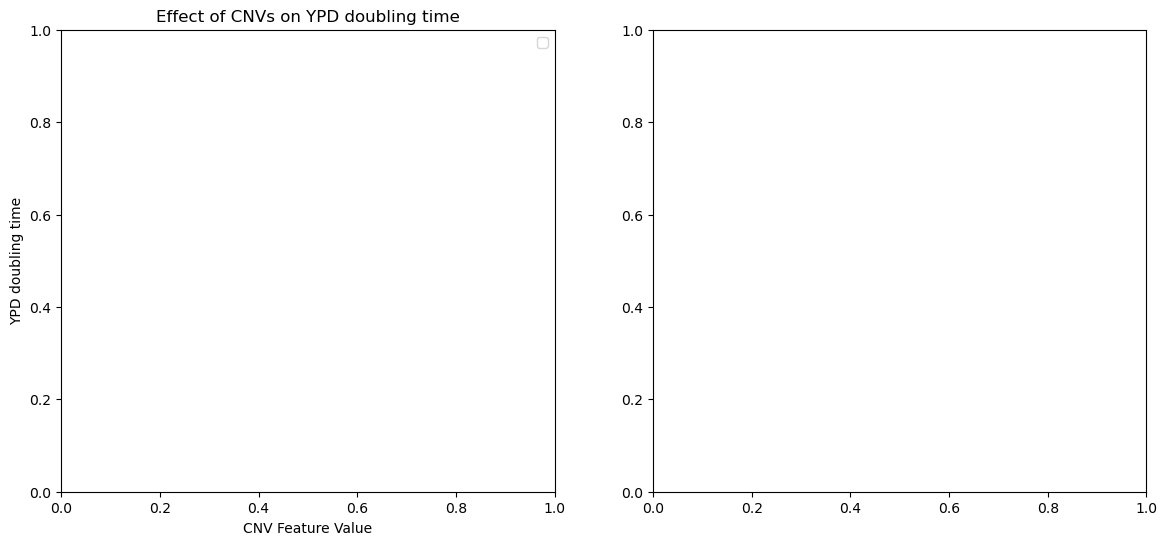

In [15]:
# Example DataFrames (assuming these are already defined)
# X_matrix is the dataframe with the features
# mutations_important contains the 17 feature names we care about
# y_phenotype contains the target values

# Select the column names in X_matrix that are present in mutations_important
selected_columns = [col for col in X_matrix.columns if col in mutations_important.values]

# Create two lists: one for columns ending with '_CNV' and one for others
cnv_columns = [col for col in selected_columns if col.endswith('_CNV')]
non_cnv_columns = [col for col in selected_columns if not col.endswith('_CNV')]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for CNV columns (columns ending with '_CNV')
for col in cnv_columns:
    axs[0].scatter(X_matrix[col], y_phenotype, label=col)
axs[0].set_title('Effect of CNVs on YPD doubling time')
axs[0].set_xlabel('CNV Feature Value')
axs[0].set_ylabel('YPD doubling time')
axs[0].legend()

# Plot for non-CNV columns (columns without '_CNV')
for col in non_cnv_columns:
    axs[1].scatter(X_matrix[col], y_phenotype, label=col)
axs[1].set_title('Effect of Mutations on YPD doubling time')
axs[1].set_xlabel('Mutation Feature Value')
axs[1].set_ylabel('YPD doubling time')
axs[1].legend()

plt.tight_layout()

# Save the plot
plot_path_mutations = f"results/plots/mutations-CNVs_vs_{phenotype}.png"  # Replace with your path
plt.savefig(plot_path_mutations)

plt.show()


In [ ]:
# Example DataFrames (ensure these are defined in your environment)
# X_matrix: DataFrame of features (mutations and CNVs)
# mutations_important: DataFrame with the important mutations and CNVs
# y_phenotype: Series or DataFrame of the phenotype (e.g., doubling time)

# Select the columns of X_matrix that are in mutations_important
selected_columns = [col for col in X_matrix.columns if col in mutations_important.iloc[:, 0].values]

# Separate CNV and non-CNV columns
cnv_columns = [col for col in selected_columns if col.endswith('_CNV')]
non_cnv_columns = [col for col in selected_columns if not col.endswith('_CNV')]

# Calculate correlation for each column with the phenotype
correlations = {}
for col in selected_columns:
    correlations[col] = X_matrix[col].corr(y_phenotype)

# Plot correlations
plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values())
plt.xticks(rotation=90)
plt.title('Correlation between Mutations/CNVs and Phenotype (Doubling Time)')
plt.xlabel('Features')
plt.ylabel('Correlation with Phenotype')
plt.tight_layout()

# Save the plot
plot_path = f"results/plots/correlation_plot_{phenotype}.png"
plt.savefig(plot_path)

plt.show()

# Calculate R^2 (variance explained) for each feature using Linear Regression
r_squared = {}
for col in selected_columns:
    model = LinearRegression()
    X = X_matrix[[col]].values.reshape(-1, 1)  # Reshape for single feature
    y = y_phenotype
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared[col] = r2_score(y, y_pred)

# Plot R^2 values
plt.figure(figsize=(10, 6))
plt.bar(r_squared.keys(), r_squared.values())
plt.xticks(rotation=90)
plt.title('Variance Explained by Each Mutation/CNV (R^2)')
plt.xlabel('Features')
plt.ylabel('R^2 (Variance Explained)')
plt.tight_layout()

# Save the plot
plot_path_r2 = f"results/plots/r2_plot_{phenotype}.png"
plt.savefig(plot_path_r2)

plt.show()

# Evaluate pairs and triplets of features to assess their combined explanatory power
# For pairs of features
pairwise_r_squared = {}
for col1 in selected_columns:
    for col2 in selected_columns:
        if col1 != col2:
            X = X_matrix[[col1, col2]]
            model = LinearRegression()
            model.fit(X, y_phenotype)
            y_pred = model.predict(X)
            pairwise_r_squared[(col1, col2)] = r2_score(y_phenotype, y_pred)

# For triplets of features
triplet_r_squared = {}
for col1 in selected_columns:
    for col2 in selected_columns:
        for col3 in selected_columns:
            if col1 != col2 and col2 != col3 and col1 != col3:
                X = X_matrix[[col1, col2, col3]]
                model = LinearRegression()
                model.fit(X, y_phenotype)
                y_pred = model.predict(X)
                triplet_r_squared[(col1, col2, col3)] = r2_score(y_phenotype, y_pred)

# Print the R^2 values for the best pairs and triplets
top_pairs = sorted(pairwise_r_squared.items(), key=lambda x: x[1], reverse=True)[:5]
top_triplets = sorted(triplet_r_squared.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Pairs of Features (R^2 values):")
for pair, r2 in top_pairs:
    print(f"{pair}: R^2 = {r2:.4f}")

print("\nTop 5 Triplets of Features (R^2 values):")
for triplet, r2 in top_triplets:
    print(f"{triplet}: R^2 = {r2:.4f}")
